In [1]:
# Importe les librairies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

from scipy import stats

<img src='./images/logo-la-poule-qui-chante.png' width=480px />

# Produisez une étude de marché avec Python

> &#9888; Ce *notebook* est le premier des deux *notebooks* qui vont composer notre étude de marché. Il contient la préparation, le nettoyage et l’analyse exploratoire des données.

Nous sommes en poste chez **La poule qui chante**, une entreprise française d’agroalimentaire qui souhaite se développer à l'international. Cependant, la liste des pays potentiels dans lesquels s'implanter est longue. Pour cela, nous allons réaliser une analyse des groupements de pays que l'on pourra cibler grâce à différentes méthodes de *clustering*, puis nous approfondirons l'étude de marché.

Les données qui vont être utilisées seront toutes issues des [statistiques de la *Food and Agriculture Organization of the United Nations (FAO)*](https://www.fao.org/faostat/fr/#home).
Nous disposons déjà de deux de leurs jeux de données et nous allons récupérer ceux dont nous allons avoir besoin afin d'élargir les critères de l'analyse. Pour définir ces derniers, nous nous inspirons de l'analyse PESTEL. En voici la synthèse.

|Domaine            |Indicateur<sup>[1]</sup>                                                  |Jeu de données                    |
|-------------------|--------------------------------------------------------------------------|----------------------------------|
|**P**olitique      |Stabilité politique et absence de violence/terrorisme (indice)            |Données de la sécurité alimentaire|
|                   |Importations - Quantité                                                   |Bilans Alimentaires               |
|**E**conomique     |Revenu national brut par habitant                                         |Indicateurs macro                 |
|                   |Croissance annuelle US$                                                   |Indicateurs macro                 |
|**S**ocial         |Population totale et calcul de la croissance moyenne                      |Séries temporelles et annuelles   |
|                   |Disponibilité alimentaire en quantité                                     |Bilans Alimentaires               |
|**T**echnologique  |Production - Quantité                                                     |Bilans Alimentaires               |
|                   |Pourcentage de la population utilisant au moins les services d'eau de base|Données de la sécurité alimentaire|
|**E**nvironnemental|Part de superficie des terres                                             |Utilisation des terres            |
|**L**égal          |Densité des animaux dans la superficie agricole                           |Tendances dans l'élevage          |

*1. Les indicateurs seront donnés pour l'année 2017.*

## Sommaire

* [Préparation des données pour l'analyse](#1)
    * [Importation](#1-1)
    * [Création du *DataFrame* final](#1-2)
    * [Vérification de `df_final`](#1-3)
    * [Exportation de `df_final`](#1-4)
* [Analyse descriptive](#2)
    * [Analyse univariée](#2-1)

## Préparation des données pour l'analyse<df_tempf_temp id=df_temp1'></df_temp>

Nous allons importer chacun des *datasets* nécessairent puis extraire, éventuellement calculer et compiler les indicateurs dans un *DataFrame* final. 

### Importation<df_tempf_temp id='1df_temp1'></df_temp>

In [2]:
df_securite = pd.read_csv('./datasets/raw/securite-2017.csv')
df_securite.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6121,Valeur,21047,Pourcentage de la population utilisant au moin...,2017,2017,%,99.00,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21047,Pourcentage de la population utilisant au moin...,2017,2017,%,66.80,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [3]:
print(f'Dimensions du DataFrame : {df_securite.shape}\n')

df_securite.info()

Dimensions du DataFrame : (394, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            394 non-null    object 
 1   Domaine                 394 non-null    object 
 2   Code zone (FAO)         394 non-null    int64  
 3   Zone                    394 non-null    object 
 4   Code Élément            394 non-null    int64  
 5   Élément                 394 non-null    object 
 6   Code Produit            394 non-null    int64  
 7   Produit                 394 non-null    object 
 8   Code année              394 non-null    int64  
 9   Année                   394 non-null    int64  
 10  Unité                   394 non-null    object 
 11  Valeur                  394 non-null    float64
 12  Symbole                 394 non-null    object 
 13  Description du Symbole  394 non-null    object 
 14  Note 

In [4]:
df_disponibilite = pd.read_csv('./datasets/raw/dispo-alimentaire-2017.csv')
df_disponibilite.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
print(f'Dimensions du DataFrame : {df_disponibilite.shape}\n')

df_disponibilite.info()

Dimensions du DataFrame : (176600, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non

In [6]:
df_macro = pd.read_csv('./datasets/raw/macro-2000-2017.csv')
df_macro.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2010,2010,Millions d’USD,14698.889680,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2010,2010,US$,521.428191,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2011,2011,Millions d’USD,17350.694950,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2011,2011,US$,593.203249,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,19136.499340,X,Ciffre de sources internationales,NaN


In [7]:
print(f'Dimensions du DataFrame : {df_macro.shape}\n')

df_macro.info()

Dimensions du DataFrame : (6764, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            6764 non-null   object 
 1   Domaine                 6764 non-null   object 
 2   Code zone (FAO)         6764 non-null   int64  
 3   Zone                    6764 non-null   object 
 4   Code Élément            6764 non-null   int64  
 5   Élément                 6764 non-null   object 
 6   Code Produit            6764 non-null   int64  
 7   Produit                 6764 non-null   object 
 8   Code année              6764 non-null   int64  
 9   Année                   6764 non-null   int64  
 10  Unité                   6764 non-null   object 
 11  Valeur                  6764 non-null   float64
 12  Symbole                 6764 non-null   object 
 13  Description du Symbole  6764 non-null   object 
 14  No

In [8]:
df_population = pd.read_csv('./datasets/raw/population-2000-2018.csv')
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [9]:
print(f'Dimensions du DataFrame : {df_population.shape}\n')

df_population.info()

Dimensions du DataFrame : (4411, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  No

In [10]:
df_utilisation = pd.read_csv('./datasets/raw/utilisation-terres-2017.csv')
df_utilisation.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,RL,Utilisation des terres,150,Pays-Bas (Royaume des),7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,54.02,E,Valeur estimée
1,RL,Utilisation des terres,2,Afghanistan,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,58.12,A,Chiffre officiel
2,RL,Utilisation des terres,202,Afrique du Sud,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,79.42,E,Valeur estimée
3,RL,Utilisation des terres,3,Albanie,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,42.86,A,Chiffre officiel
4,RL,Utilisation des terres,4,Algérie,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,17.36,A,Chiffre officiel


In [11]:
print(f'Dimensions du DataFrame : {df_utilisation.shape}\n')

df_utilisation.info()

Dimensions du DataFrame : (227, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            227 non-null    object 
 1   Domaine                 227 non-null    object 
 2   Code zone (FAO)         227 non-null    int64  
 3   Zone                    227 non-null    object 
 4   Code Élément            227 non-null    int64  
 5   Élément                 227 non-null    object 
 6   Code Produit            227 non-null    int64  
 7   Produit                 227 non-null    object 
 8   Code année              227 non-null    int64  
 9   Année                   227 non-null    int64  
 10  Unité                   227 non-null    object 
 11  Valeur                  227 non-null    float64
 12  Symbole                 227 non-null    object 
 13  Description du Symbole  227 non-null    object 
dtypes: fl

In [12]:
df_tendances = pd.read_csv('./datasets/raw/tendances-2017.csv')
df_tendances.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l’élevage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.00,E,Valeur estimée
1,EK,Tendances dans l’élevage,202,Afrique du Sud,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.02,E,Valeur estimée
2,EK,Tendances dans l’élevage,3,Albanie,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.07,E,Valeur estimée
3,EK,Tendances dans l’élevage,4,Algérie,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.03,E,Valeur estimée
4,EK,Tendances dans l’élevage,79,Allemagne,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.10,E,Valeur estimée


In [13]:
print(f'Dimensions du DataFrame : {df_tendances.shape}\n')

df_tendances.info()

Dimensions du DataFrame : (194, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            194 non-null    object 
 1   Domaine                 194 non-null    object 
 2   Code zone (FAO)         194 non-null    int64  
 3   Zone                    194 non-null    object 
 4   Code Élément            194 non-null    int64  
 5   Élément                 194 non-null    object 
 6   Code Produit (CPC)      194 non-null    int64  
 7   Produit                 194 non-null    object 
 8   Code année              194 non-null    int64  
 9   Année                   194 non-null    int64  
 10  Unité                   194 non-null    object 
 11  Valeur                  194 non-null    float64
 12  Symbole                 194 non-null    object 
 13  Description du Symbole  194 non-null    object 
dtypes: fl

Les noms des variables comprennent des majuscules, des espaces ou des accents. Pour simplifier la lecture et les manipulations, nous créons une fonction qui va convertir les variables selon la convention *snake case*.

In [14]:
def snake_case (df):
    """Renomme les variables d'un DataFrame selon la convention snake case."""
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('\'', '_')
        .str.replace(' - ', '_')
        .str.replace('-', '_')
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

On applique ensuite cette fonction à nos jeux de données.

In [15]:
# Crée la liste des DataFrames
dfs = ['df_securite', 'df_disponibilite', 'df_macro', 'df_population',
       'df_utilisation', 'df_tendances']

# Applique la fonction 'snake_case' aux DataFrames
for df in dfs:
    snake_case(eval(df))

### Création du *DataFrame* final<df_tempf_temp id='1df_temp2'></df_temp>

Avant de commencer à extraire les informations qui nous intéressent au sein de chaque *dataset*, nous allons déterminer celui qui contient le plus de pays. C'est par ce dernier que nous commencerons. Si des pays doivent être retirés à cause d'un nombre de données manquantes trop important, nous le ferons par la suite.

In [16]:
# Affiche les dimensions de chaque DataFrame
print('Nombre de pays dans le DataFrame :')
for df in dfs:
    print(df, ':', eval(df)['zone'].nunique())

del df, dfs

Nombre de pays dans le DataFrame :
df_securite : 201
df_disponibilite : 174
df_macro : 212
df_population : 238
df_utilisation : 227
df_tendances : 194


C'est le *DataFrame* de la population qui contient le plus de données. Ce sera notre point de départ, puis nous ajouterons les informations par ordre décroissant de pays.

#### `df_population`

In [17]:
df_population.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


On commence par récupérer la valeur de la population en 2017 que l'on stocke dans un nouveau *DataFrame*. Chaque nouvelle variable que nous récupérerons sera ensuite ajoutée à ce dernier.

In [18]:
# Crée un nouveau DataFrame à partir de 'df_population'
df_final = df_population.loc[
    df_population['annee'] == 2017, ['code_zone', 'zone', 'valeur' ]
].reset_index(drop=True)

# Renomme la variable 'valeur'
df_final = df_final.rename(columns={'valeur': 'population_millier_habitants'})

On calcule ensuite la tendance démographique. Pour cela, nous allons calculer le taux d'accroisement par année entre 2010 et 2017, puis nous calculerons la moyenne de ce taux.

In [19]:
# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_population[['code_zone', 'annee', 'valeur']]

# Pivote les codes zone
df_temp = df_temp.pivot_table(index='annee', columns='code_zone',
                              values='valeur')

# Complète les valeurs manquantes par celles de la ligne précédente
df_temp = df_temp.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_temp = df_temp.pct_change()

# Calcule la moyenne de chaque colonne
df_temp = (df_temp.mean() * 100).round(2).to_frame(
    name='croissance_moyenne_population_%').reset_index()

# Ajoute le résultat à 'df_final'
df_final = pd.merge(df_final, df_temp, on=['code_zone'], how='left')

del df_temp, df_population

#### `df_utilisation`

In [20]:
df_utilisation.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,RL,Utilisation des terres,150,Pays-Bas (Royaume des),7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,54.02,E,Valeur estimée
1,RL,Utilisation des terres,2,Afghanistan,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,58.12,A,Chiffre officiel
2,RL,Utilisation des terres,202,Afrique du Sud,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,79.42,E,Valeur estimée


On ajoute simplement la valeur de la part de superficie des terres agricoles à notre jeu de données final.

In [21]:
# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_utilisation[['code_zone_(fao)', 'valeur']],
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'part_terres_agricoles_%'})

del df_utilisation

#### `df_macro`

In [22]:
df_macro.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2010,2010,Millions d’USD,14698.889680,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2010,2010,US$,521.428191,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2011,2011,Millions d’USD,17350.694950,X,Ciffre de sources internationales,NaN


On récupère tout d'abord le revenu national brut par habitant en 2017.

In [23]:
# # Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_macro.loc[
    (df_macro['annee'] == 2017)
    & (df_macro['element'] == 'Valeur US $ par habitant')
    & (df_macro['produit'] == 'Revenu national brut'),
    ['code_zone_(fao)', 'valeur']
].reset_index(drop=True)

# Renomme la variable 'valeur'
df_temp = df_temp.rename(columns={'valeur': 'revenu_par_habitant_usd'})

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp,
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

del df_temp

Puis on calcule le taux de croissance moyen à partir du PIB sur la période 2000-2017.

In [24]:
# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_macro.loc[
    (df_macro['element'] == 'Valeur US $')
    & (df_macro['produit'] == 'Produit Intérieur Brut'),
    ['code_zone_(fao)', 'annee', 'valeur']
].reset_index(drop=True)

# Pivote les codes zone
df_temp = df_temp.pivot_table(index='annee', columns='code_zone_(fao)',
                              values='valeur')

# Complète les valeurs manquantes par celles de la ligne précédente
df_temp = df_temp.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_temp = df_temp.pct_change()

# Calcule la moyenne de chaque colonne
df_temp = (df_temp.mean() * 100).round(2).to_frame(
    name='croissance_moyenne_pib_%').reset_index()

# Ajoute le résultat à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp,
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

del df_temp, df_macro

#### `df_securite`

In [25]:
df_securite.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6121,Valeur,21047,Pourcentage de la population utilisant au moin...,2017,2017,%,99.00,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN


On ajoute le taux d'accès à l'eau potable et l'indice de stabilité.

In [26]:
# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_securite[['code_zone_(fao)', 'produit', 'valeur']]

# Pivote les éléments
df_temp = (
    df_temp.pivot_table(index='code_zone_(fao)', columns='produit', values='valeur')
    .reset_index()
    .rename_axis(None, axis='columns'))

# Renomme les variables
df_temp = df_temp.rename(
    columns={
        'Pourcentage de la population utilisant au moins les services d\'eau de base': \
            'acces_eau_potable_%_population',
        'Stabilité politique et absence de violence/terrorisme (indice)': \
            'indice_stabilite_politique'
    }
)

# Ajoute les variables à 'df_final'Pourcentage de la population utilisant au moins les services d'eau de base
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'acces_eau_potable_%_population',
             'indice_stabilite_politique']],
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

del df_temp, df_securite

#### `df_tendances`

In [27]:
df_tendances.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit_(cpc),produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,EK,Tendances dans l’élevage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.00,E,Valeur estimée
1,EK,Tendances dans l’élevage,202,Afrique du Sud,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.02,E,Valeur estimée
2,EK,Tendances dans l’élevage,3,Albanie,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.07,E,Valeur estimée


On ajoute la densité de poulets à notre jeu de données final.

In [28]:
# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_tendances[['code_zone_(fao)', 'valeur']],
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'densite_poulets_ugb_par_ha'})

del df_tendances

#### `df_disponibilite`

In [29]:
df_disponibilite.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


On souhaite récupérer les importations, la disponibilité alimentaire et la production uniquement pour les volailles hors tous les produits sont présents dans nos données. Il faut donc trouver quelle dénomination est utilisée pour les poulets.

In [30]:
df_disponibilite.loc[
    df_disponibilite['produit'].str.contains('poulet', case=False)
]['produit'].unique()

array([], dtype=object)

In [31]:
df_disponibilite.loc[
    df_disponibilite['produit'].str.contains('volaille', case=False)
]['produit'].unique()

array(['Viande de Volailles'], dtype=object)

Il faut donc filtrer les produits avec « Viande de Volailles ».

In [32]:
# Crée la liste des éléments à garder
liste_element = ['Production', 'Importations - Quantité',
                 'Disponibilité alimentaire en quantité (kg/personne/an)']

# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_disponibilite.loc[
    (df_disponibilite['element'].isin(liste_element))
    & (df_disponibilite['produit'] == 'Viande de Volailles')
]

# Pivote les éléments
df_temp = (
    df_temp.pivot_table(index='code_zone', columns='element', values='valeur')
    .reset_index()
    .rename_axis(None, axis='columns'))

# Renomme les variables
df_temp = df_temp.rename(
    columns={
        'Disponibilité alimentaire en quantité (kg/personne/an)': \
            'disponibilite_kg_personne_an',
        'Importations - Quantité': 'importations_milliers_tonnes',
        'Production': 'production_milliers_tonnes'
    }
)

# Ajoute les variables à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'disponibilite_kg_personne_an',
             'importations_milliers_tonnes', 'production_milliers_tonnes']],
    how='left',
    on=['code_zone']
)

del df_disponibilite, df_temp, liste_element

### Vérification de `df_final`<df_tempf_temp id='1df_temp3'></df_temp>

#### Aperçu des données

In [33]:
df_final.head()

,code_zone,zone,population_millier_habitants,croissance_moyenne_population_%,part_terres_agricoles_%,revenu_par_habitant_usd,croissance_moyenne_pib_%,acces_eau_potable_%_population,indice_stabilite_politique,densite_poulets_ugb_par_ha,disponibilite_kg_personne_an,importations_milliers_tonnes,production_milliers_tonnes
0,2,Afghanistan,36296.113,3.29,58.12,537.126294,3.91,66.8,-2.80,0.00,1.53,29.0,28.0
1,202,Afrique du Sud,57009.756,1.40,79.42,6537.504869,-0.86,92.7,-0.28,0.02,35.69,514.0,1667.0
2,3,Albanie,2884.169,-0.45,42.86,4532.791976,1.56,94.1,0.38,0.07,16.36,38.0,13.0
3,4,Algérie,41389.189,1.72,17.36,4081.775086,1.60,93.8,-0.92,0.03,6.38,2.0,275.0
4,79,Allemagne,82658.409,0.12,47.76,45734.557505,1.50,99.0,0.59,0.10,19.47,842.0,1514.0


In [34]:
print('Dimensions du DataFrame:', df_final.shape)

Dimensions du DataFrame: (236, 13)


#### Réorganisation des variables

In [35]:
# Suppression de 'code_zone'
df_final = df_final.drop(columns='code_zone')

# Réorganisation de l'ordre des variables
df_final = df_final[[
    'zone', 'indice_stabilite_politique', 'importations_milliers_tonnes',
    'revenu_par_habitant_usd', 'croissance_moyenne_pib_%',
    'population_millier_habitants', 'croissance_moyenne_population_%',
    'disponibilite_kg_personne_an', 'production_milliers_tonnes',
    'acces_eau_potable_%_population', 'part_terres_agricoles_%',
    'densite_poulets_ugb_par_ha'
]]

#### Type des données

In [36]:
df_final.dtypes

zone                                object
indice_stabilite_politique         float64
importations_milliers_tonnes       float64
revenu_par_habitant_usd            float64
croissance_moyenne_pib_%           float64
population_millier_habitants       float64
croissance_moyenne_population_%    float64
disponibilite_kg_personne_an       float64
production_milliers_tonnes         float64
acces_eau_potable_%_population     float64
part_terres_agricoles_%            float64
densite_poulets_ugb_par_ha         float64
dtype: object

Le type des données est correct.

#### Doublons

In [37]:
print('Nombre de doublons dans le DataFrame :', df_final.duplicated().sum())

Nombre de doublons dans le DataFrame : 0


#### Valeurs manquantes

In [38]:
df_final.isna().sum()

zone                                0
indice_stabilite_politique         40
importations_milliers_tonnes       66
revenu_par_habitant_usd            26
croissance_moyenne_pib_%           25
population_millier_habitants        0
croissance_moyenne_population_%     0
disponibilite_kg_personne_an       64
production_milliers_tonnes         68
acces_eau_potable_%_population     38
part_terres_agricoles_%            11
densite_poulets_ugb_par_ha         43
dtype: int64

Le nombre de valeurs manquantes est assez important. Dans un premier temps, nous allons supprimer les enregistrements qui ont un nombre de valeurs manquantes supérieur ou égal à 6 (sur 11 indicateurs). Au préalable, nous sauvegardons la liste des zones pour pouvoir la comparer avec celle après nettoyage.

In [39]:
# Crée la liste initiale des zones
liste_initiale_zones = set(df_final['zone'].unique())

# Supprime les zones avec NaN >= 6
df_final = (
    df_final[df_final.isna().sum(axis='columns') < 6]).reset_index(drop=True)

df_final.isna().sum()

zone                                0
indice_stabilite_politique          5
importations_milliers_tonnes       30
revenu_par_habitant_usd             1
croissance_moyenne_pib_%            1
population_millier_habitants        0
croissance_moyenne_population_%     0
disponibilite_kg_personne_an       28
production_milliers_tonnes         32
acces_eau_potable_%_population      5
part_terres_agricoles_%             1
densite_poulets_ugb_par_ha          9
dtype: int64

Dans un second temps, nous supprimons les pays pour lesquels nous n'avons ni la valeur des importations, ni celle de la production et ni celle de la disponibilité.

In [40]:
df_final = df_final.loc[
    (~df_final['importations_milliers_tonnes'].isna())
    & (~df_final['disponibilite_kg_personne_an'].isna())
    & (~df_final['production_milliers_tonnes'].isna())
].reset_index(drop=True)

df_final.isna().sum()

zone                               0
indice_stabilite_politique         4
importations_milliers_tonnes       0
revenu_par_habitant_usd            1
croissance_moyenne_pib_%           1
population_millier_habitants       0
croissance_moyenne_population_%    0
disponibilite_kg_personne_an       0
production_milliers_tonnes         0
acces_eau_potable_%_population     4
part_terres_agricoles_%            1
densite_poulets_ugb_par_ha         2
dtype: int64

Il reste peu d'enregistrements à traiter. Affichons les zones concernées et essayons de les traiter au cas par cas.

In [41]:
df_final.loc[df_final.isna().any(axis='columns')]

,zone,indice_stabilite_politique,importations_milliers_tonnes,revenu_par_habitant_usd,croissance_moyenne_pib_%,population_millier_habitants,croissance_moyenne_population_%,disponibilite_kg_personne_an,production_milliers_tonnes,acces_eau_potable_%_population,part_terres_agricoles_%,densite_poulets_ugb_par_ha
8,Argentine,0.17,8.0,14236.884208,6.79,43937.140,1.03,42.24,2161.0,NaN,42.99,0.01
32,Chine - RAS de Macao,1.43,23.0,70300.937271,9.65,622.585,2.19,34.47,3.0,99.0,NaN,NaN
33,"Chine, continentale",NaN,452.0,8717.698270,10.77,1421021.791,0.56,12.33,18236.0,NaN,55.62,0.10
34,"Chine, Taiwan Province de",NaN,161.0,NaN,NaN,23674.546,0.43,33.17,652.0,NaN,22.39,1.19
40,Croatie,0.69,24.0,13365.337490,-0.77,4182.857,-0.35,10.77,61.0,NaN,26.75,0.07
51,États-Unis d'Amérique,0.29,123.0,60297.391594,3.75,325084.756,0.83,55.68,21914.0,99.0,44.36,NaN
113,Nouvelle-Calédonie,NaN,9.0,32263.340715,0.13,277.150,1.42,38.71,1.0,98.6,10.07,0.03
124,Polynésie française,NaN,15.0,19743.958991,-0.34,276.102,0.80,47.40,1.0,99.0,13.40,0.07


On complète l'accès à l'eau potable pour l'Argentine et la Croatie avec la valeur médiane.

In [42]:
df_final.loc[[8, 40], ['acces_eau_potable_%_population']] = (
    df_final['acces_eau_potable_%_population'].median())

Macao est une économie essentiellement basée sur le tertiaire sur un territoire de moins de 30 km². Nous allons considérer que sa part de surface agricole et sa densité de poulets sont nulles.

In [43]:
df_final.loc[32, ['part_terres_agricoles_%', 'densite_poulets_ugb_par_ha']] = 0

Pour la Chine, nous complétons l'indice de stabilité ainsi que l'accès à l'eau par les valeurs médianes.

In [44]:
df_final.loc[33, ['indice_stabilite_politique']] = (
    df_final['indice_stabilite_politique'].median())

df_final.loc[33, ['acces_eau_potable_%_population']] = (
    df_final['acces_eau_potable_%_population'].median())

Il y df_tempf_temp encore trop de valeurs manquantes pour Taiwan, nous allons supprimer l'enregistrement.

In [45]:
df_final = df_final.drop(index=34)

Aux Etats-Unis, on complète la densité de poulets par la valeur moyenne.

In [46]:
df_final.loc[51, 'densite_poulets_ugb_par_ha'] = (
    df_final['densite_poulets_ugb_par_ha'].mean())

La Nouvelle-Calédonie et la Polynésie française font partie des DROM-COM. Nous leur donnons le même indice de stabilité politique que pour la Fance.

In [47]:
# Récupère l'indice de stabilité de la France
indice = df_final.loc[
    df_final['zone'].str.contains('France', case=False),
    'indice_stabilite_politique'
].values[0]

# Impute la valeur
df_final.loc[[113, 124], 'indice_stabilite_politique'] = indice

del indice

In [48]:
# RAZ de l'index de 'df_final'
df_final = df_final.reset_index(drop=True)

Le traitement des valeurs manquantes étant terminer, nous allons vérifier la liste des zones supprimées.

In [49]:
# Crée la liste des zones après traitement
liste_finales_zones = set(df_final['zone'].unique())

# Crée la liste des zones supprimées
liste_zones_supprimees = liste_initiale_zones - liste_finales_zones

# Affiche la liste des zones supprimées
print(liste_zones_supprimees)

{'Îles Cook', 'Sint Maarten  (partie néerlandaise)', 'Tokélaou', 'Liechtenstein', 'Îles Anglo-Normandes', 'Îles Turques-et-Caïques', 'Guinée équatoriale', 'Guyane française', 'Singapour', 'République arabe syrienne', 'Bhoutan', 'Micronésie (États fédérés de)', 'Samoa américaines', 'Palaos', 'République démocratique populaire lao', 'Îles Wallis-et-Futuna', 'Antilles néerlandaises (ex)', 'Comores', 'Chine, Taiwan Province de', 'Îles Caïmanes', 'Saint-Martin (partie française)', 'Somalie', 'Brunéi Darussalam', 'Bonaire, Saint-Eustache et Saba', 'Saint-Pierre-et-Miquelon', 'Curaçao', 'Andorre', 'Montserrat', 'Tonga', 'Réunion', 'Tuvalu', 'Îles Vierges américaines', 'Palestine', 'Papouasie-Nouvelle-Guinée', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Burundi', 'Saint-Siège', 'Anguilla', 'Sahara occidental', 'Porto Rico', 'Seychelles', 'Nioué', 'Ouzbékistan', 'Îles Falkland (Malvinas)', 'Érythrée', 'Bermudes', 'Martinique', 'Aruba', 'Îles Féroé', 'Groenland', 'Saint-Marin', 'Îles Marian

On remarque que nous avons essentiellement supprimé des îles ou des régions appartenant à d'autres pays.

In [50]:
del liste_initiale_zones, liste_finales_zones, liste_zones_supprimees

### Exportation de `df_final`<df_tempf_temp id='1df_temp4'></df_temp>

In [51]:
df_final.to_csv('./datasets/indicateurs-zones-2017.csv', sep=';', index=False,
                decimal=',')

## Analyse descriptive<df_tempf_temp id=df_temp2'></df_temp>

### Analyse univariée<df_tempf_temp id='2df_temp1'></df_temp>

In [52]:
# Affiche le nombre de pays
print('Nombre de pays dans le jeu de données :', df_final['zone'].nunique())

# Affiche le nombre d'indicateurs
print('Nombre d\'indicateurs :', (len(df_final.columns) - 1))

Nombre de pays dans le jeu de données : 167
Nombre d'indicateurs : 11


Nous pouvons créer une liste de nos indicateurs qui nous permettra nous aidera par la suite à tracer nos représentations graphiques

In [53]:
# Crée la liste des indicateurs
indicateurs = (list(df_final.columns))
indicateurs.remove('zone')

In [54]:
# Affiche la description des variables quantitatives
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
indice_stabilite_politique,167.0,-0.064790,0.901719,-2.940000,-0.625000,0.00000,0.650000,1.600000e+00
importations_milliers_tonnes,167.0,90.083832,188.050602,0.000000,3.000000,16.00000,80.500000,1.069000e+03
revenu_par_habitant_usd,167.0,13766.556876,18299.979960,435.871219,1890.051387,5934.25591,17100.416654,8.111845e+04
croissance_moyenne_pib_%,167.0,3.937186,3.638560,-6.270000,1.335000,3.86000,6.100000,1.689000e+01
population_millier_habitants,167.0,43741.041533,155245.940046,52.045000,2902.508500,9785.84300,30460.706000,1.421022e+06
croissance_moyenne_population_%,167.0,1.364311,1.223943,-1.230000,0.495000,1.26000,2.230000,6.580000e+00
disponibilite_kg_personne_an,167.0,20.445988,15.918812,0.130000,6.760000,18.27000,30.125000,7.231000e+01
production_milliers_tonnes,167.0,725.628743,2508.973852,0.000000,13.500000,69.00000,376.500000,2.191400e+04
acces_eau_potable_%_population,167.0,87.983533,15.135467,40.200000,81.250000,95.45000,99.000000,9.900000e+01
part_terres_agricoles_%,167.0,38.904850,20.805299,0.000000,22.405000,39.98000,52.535000,8.127000e+01


Les variables ont des échelles assez différentes, on le voit entre celles exprimées millier et celles en pourcentage ou en indice. Il faudra prendre en compte cela lorsque nous approfondirons les analyses. On s'aperçoit aussi que plusieurs variables ont des valeurs moyennes éloignées des valeurs médianes (revenu, population, etc.).

#### Distribution des indicateurs

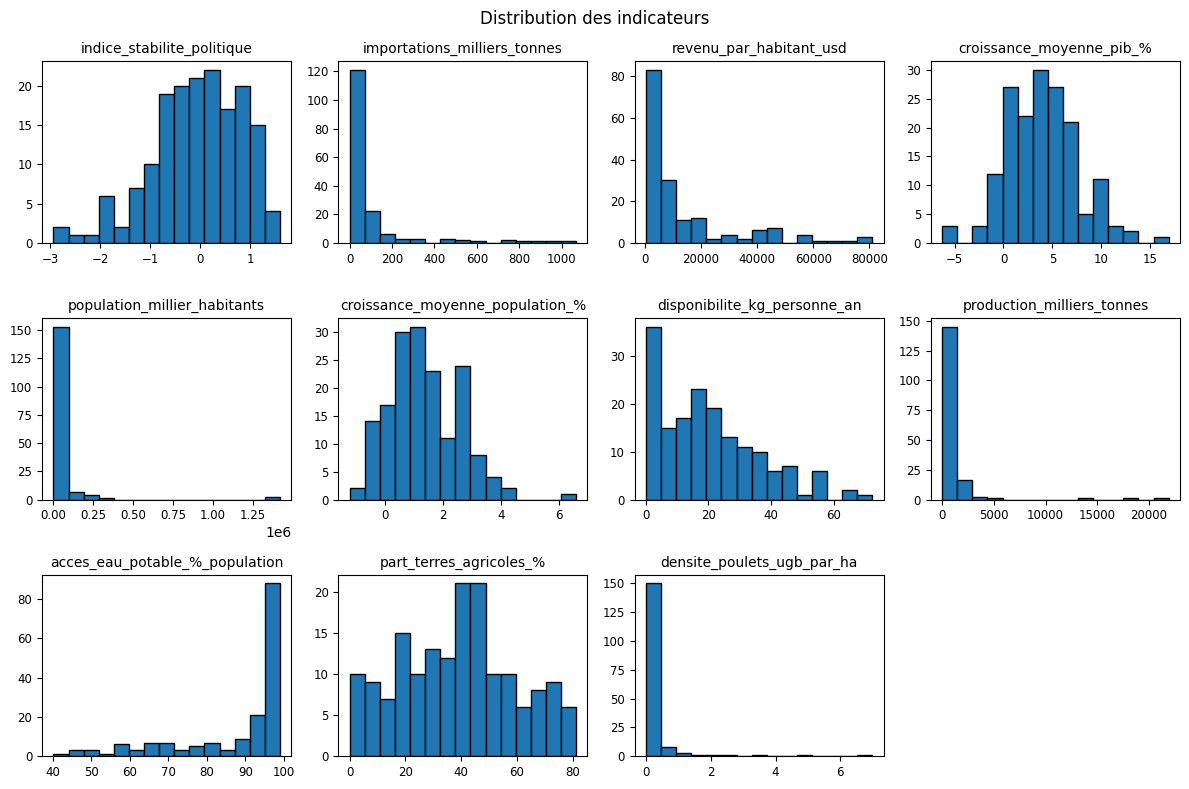

In [55]:
# Trace l'histogramme pour chaque indicateur
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

for i, indicateur in enumerate(indicateurs):
    x = np.floor(i / 4).astype(int)
    y = i % 4
    axs[x, y].hist(indicateur, data=df_final, edgecolor='k', bins=15)
    axs[x, y].set_title(str(indicateur), size=10)
    axs[x, y].tick_params(axis='both', which='both', labelsize=8.5)

[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]
fig.suptitle('Distribution des indicateurs')
plt.tight_layout()
plt.show()

del fig, axs, i, indicateur, x, y

#### Dispersion des indicateurs

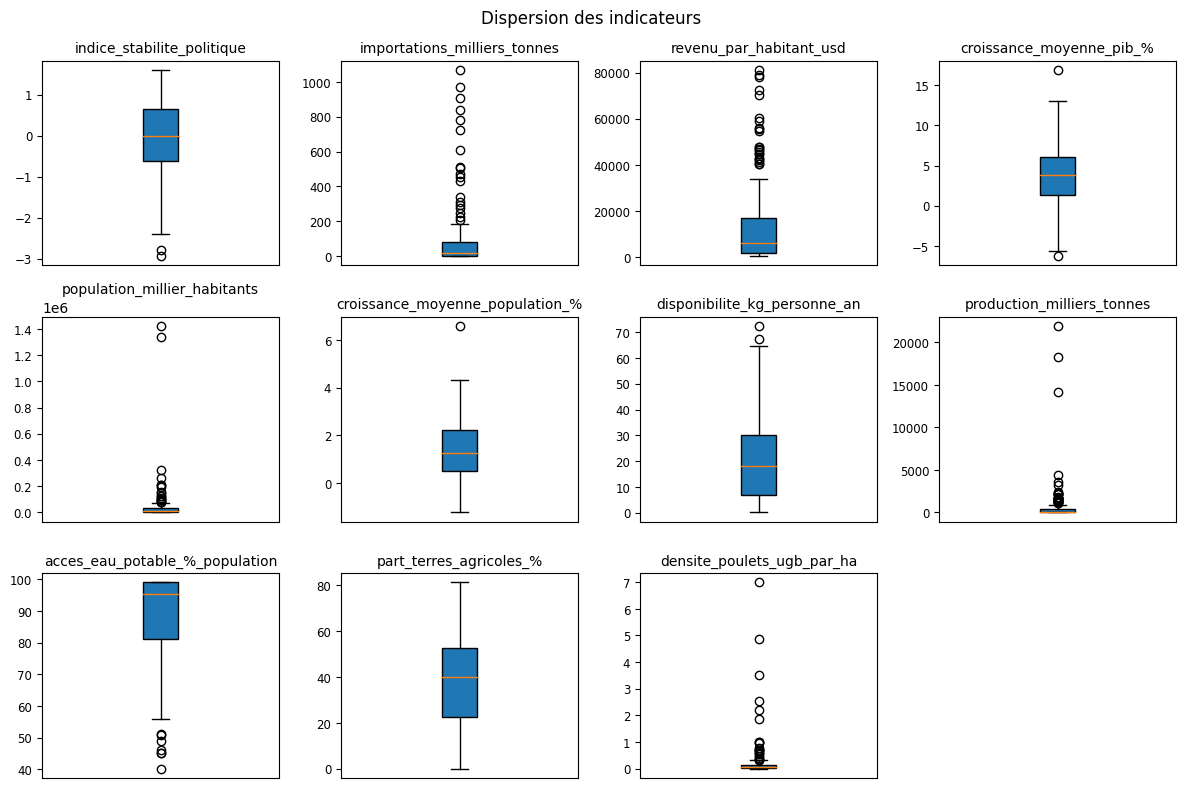

In [56]:
# Trace la boîte à moustache pour chaque indicateur
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

for i, indicateur in enumerate(indicateurs):
    x = np.floor(i / 4).astype(int)
    y = i % 4
    axs[x, y].boxplot(indicateur, data=df_final, patch_artist=True)
    axs[x, y].set_title(str(indicateur), size=10)
    axs[x, y].xaxis.set_major_locator(plt.NullLocator())
    axs[x, y].tick_params(axis='y', which='both', labelsize=8.5)

[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]
fig.suptitle('Dispersion des indicateurs')
plt.tight_layout()
plt.show()

del fig, axs, i, indicateur, x, y

On remarque que certains indicateurs ont un nombre d'*ouliers* signicatif. Nous allons afficher les zones concernées.

In [57]:
# Affichage les 10 plus gros importateurs
df_final[['zone', 'importations_milliers_tonnes']].nlargest(
    10, 'importations_milliers_tonnes')

,zone,importations_milliers_tonnes
79,Japon,1069.0
101,Mexique,972.0
31,Chine - RAS de Hong-Kong,907.0
4,Allemagne,842.0
132,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0
7,Arabie saoudite,722.0
119,Pays-Bas,608.0
1,Afrique du Sud,514.0
55,France,506.0
73,Iraq,470.0


In [58]:
# Affichage les 10 pays avec le plus de revenus
df_final[['zone', 'revenu_par_habitant_usd']].nlargest(
    10, 'revenu_par_habitant_usd')

,zone,revenu_par_habitant_usd
147,Suisse,81118.449926
91,Luxembourg,78873.811060
111,Norvège,78263.704686
75,Islande,72312.699778
32,Chine - RAS de Macao,70300.937271
50,États-Unis d'Amérique,60297.391594
41,Danemark,59155.352620
74,Irlande,56058.607933
10,Australie,55633.452640
146,Suède,54722.389207


In [59]:
# Affichage les 10 pays avec le plus de population
df_final[['zone', 'population_millier_habitants']].nlargest(
    10, 'population_millier_habitants')

,zone,population_millier_habitants
33,"Chine, continentale",1421021.791
70,Inde,1338676.785
50,États-Unis d'Amérique,325084.756
71,Indonésie,264650.963
116,Pakistan,207906.209
23,Brésil,207833.823
110,Nigéria,190873.244
14,Bangladesh,159685.424
52,Fédération de Russie,145530.082
79,Japon,127502.725


In [60]:
# Affichage les 10 plus gros producteurs
df_final[['zone', 'production_milliers_tonnes']].nlargest(
    10, 'production_milliers_tonnes')

,zone,production_milliers_tonnes
50,États-Unis d'Amérique,21914.0
33,"Chine, continentale",18236.0
23,Brésil,14201.0
52,Fédération de Russie,4444.0
70,Inde,3545.0
101,Mexique,3249.0
122,Pologne,2351.0
71,Indonésie,2301.0
79,Japon,2215.0
158,Turquie,2192.0


In [61]:
# Affichage les 10 pays ayant le moins accès à l'eau potable
df_final[['zone', 'acces_eau_potable_%_population']].nsmallest(
    10, 'acces_eau_potable_%_population')

,zone,acces_eau_potable_%_population
125,République centrafricaine,40.2
51,Éthiopie,45.1
150,Tchad,45.1
109,Niger,46.1
25,Burkina Faso,49.0
93,Madagascar,50.7
115,Ouganda,51.0
5,Angola,55.8
104,Mozambique,56.0
130,République-Unie de Tanzanie,56.7


In [62]:
# Affichage les 10 pays ayant la densité de poulet la plus importante
df_final[['zone', 'densite_poulets_ugb_par_ha']].nlargest(
    10, 'densite_poulets_ugb_par_ha')

,zone,densite_poulets_ugb_par_ha
155,Trinité-et-Tobago,6.99
15,Barbade,4.87
85,Koweït,3.50
31,Chine - RAS de Hong-Kong,2.55
13,Bahamas,2.22
99,Maurice,1.85
88,Liban,1.02
126,République de Corée,1.02
97,Malte,0.97
128,République dominicaine,0.76


### Analyse bivariée

Commençons par calculer les corrélations entres nos variables.

In [63]:
matrice_correlation = df_final.corr(numeric_only=True)
matrice_correlation.style.format('{:.2f}')

,indice_stabilite_politique,importations_milliers_tonnes,revenu_par_habitant_usd,croissance_moyenne_pib_%,population_millier_habitants,croissance_moyenne_population_%,disponibilite_kg_personne_an,production_milliers_tonnes,acces_eau_potable_%_population,part_terres_agricoles_%,densite_poulets_ugb_par_ha
indice_stabilite_politique,1.00,0.09,0.56,-0.11,-0.14,-0.37,0.44,-0.03,0.49,-0.24,0.14
importations_milliers_tonnes,0.09,1.00,0.29,-0.15,0.15,-0.06,0.17,0.19,0.23,0.06,0.07
revenu_par_habitant_usd,0.56,0.29,1.00,-0.20,-0.04,-0.18,0.39,0.13,0.47,-0.21,0.12
croissance_moyenne_pib_%,-0.11,-0.15,-0.20,1.00,0.15,0.28,-0.23,-0.00,-0.27,0.08,-0.08
population_millier_habitants,-0.14,0.15,-0.04,0.15,1.00,-0.03,-0.09,0.62,0.04,0.13,-0.04
croissance_moyenne_population_%,-0.37,-0.06,-0.18,0.28,-0.03,1.00,-0.26,-0.11,-0.55,-0.06,-0.04
disponibilite_kg_personne_an,0.44,0.17,0.39,-0.23,-0.09,-0.26,1.00,0.19,0.58,-0.36,0.37
production_milliers_tonnes,-0.03,0.19,0.13,-0.00,0.62,-0.11,0.19,1.00,0.16,0.05,-0.03
acces_eau_potable_%_population,0.49,0.23,0.47,-0.27,0.04,-0.55,0.58,0.16,1.00,-0.21,0.19
part_terres_agricoles_%,-0.24,0.06,-0.21,0.08,0.13,-0.06,-0.36,0.05,-0.21,1.00,-0.25


Puis représentons-la sous forme graphique.

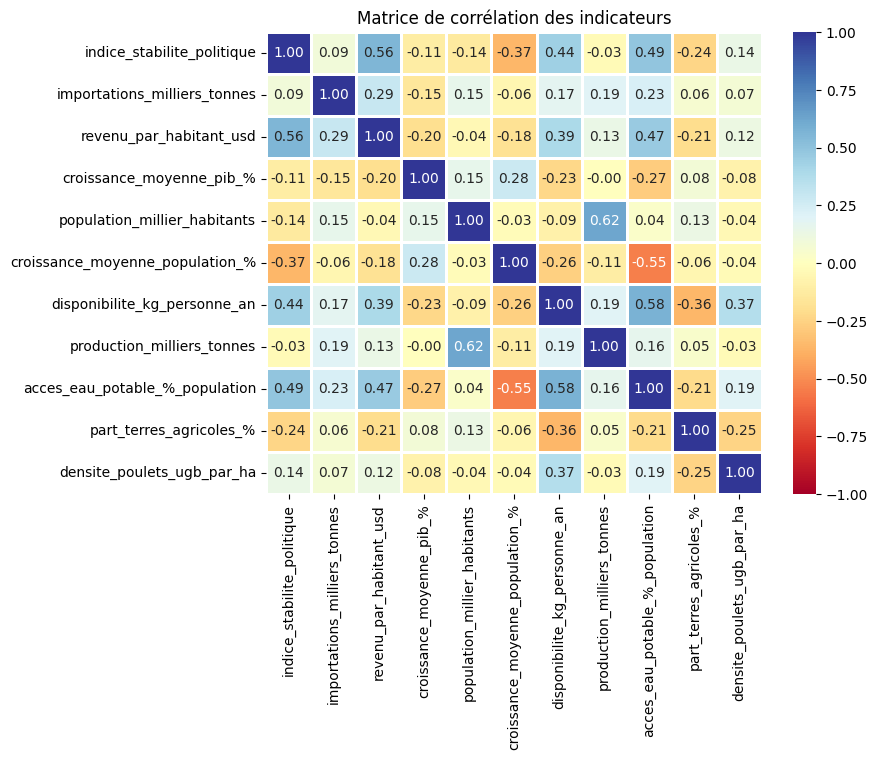

In [64]:
fig = plt.figure(figsize=(8, 6))

sns.heatmap(matrice_correlation, annot=True, fmt='.2f', vmin=-1, vmax=1,
annot_kws=None, linewidths=1, cmap='RdYlBu')

plt.title('Matrice de corrélation des indicateurs')

plt.show()

del fig

Traçons les relations entre variables ayant les valeurs de corrélations les plus significatives. Pour cela, et afin d'automatiser la sélection des variables, nous créons une fonction qui permet de ne tracer que les paires de variables qui nous intéressent.

In [65]:
def filtered_pairplot(df, corr_value, x_grid_size=4):
    """
    Trace les paires de variables en les filtrant à partir de leur valeur de 
    corrélation calculées dans la matrice de corrélation.
    Paramètres :
    - df : DataFrame source.
    - corr_value : valeur de corrélation minimale pour tracer la paire.
    - x_grid_size : nombre de colonne du graphique.
    """
    df_temp = df.corr(numeric_only=True).unstack().reset_index()
    df_temp = df_temp.rename(
        columns={'level_0': 'var_0', 'level_1': 'var_1', 0: 'value'})
    df_temp = df_temp.loc[(np.abs(df_temp['value']) >= corr_value)
                          & (np.abs(df_temp['value']) != 1)]
    df_temp = df_temp.drop_duplicates(subset='value')

    y_grid_size = np.ceil(len(df_temp) / 4).astype(int)

    fig, axs = plt.subplots(nrows=y_grid_size, ncols=x_grid_size,
                            figsize=((x_grid_size * 3), (2 * y_grid_size + 2)))

    for i, row in enumerate(df_temp.itertuples()):

        x = np.floor(i / x_grid_size).astype(int)
        y = i % x_grid_size
        
        axs[x, y].scatter(df[row.var_0], df[row.var_1], edgecolors='w')
        axs[x, y].set_xlabel(str(row.var_0), size=9)
        axs[x, y].set_ylabel(str(row.var_1), size=9)
        axs[x, y].tick_params(axis='both', which='both', labelsize=8.5)
  
    [fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

    fig.suptitle(('Relation entre les variables avec corrélation >= +/- '
                  + str(corr_value)), y=1.0)
    fig.tight_layout()
    plt.show()

On peut ensuite tracer nos graphiques.

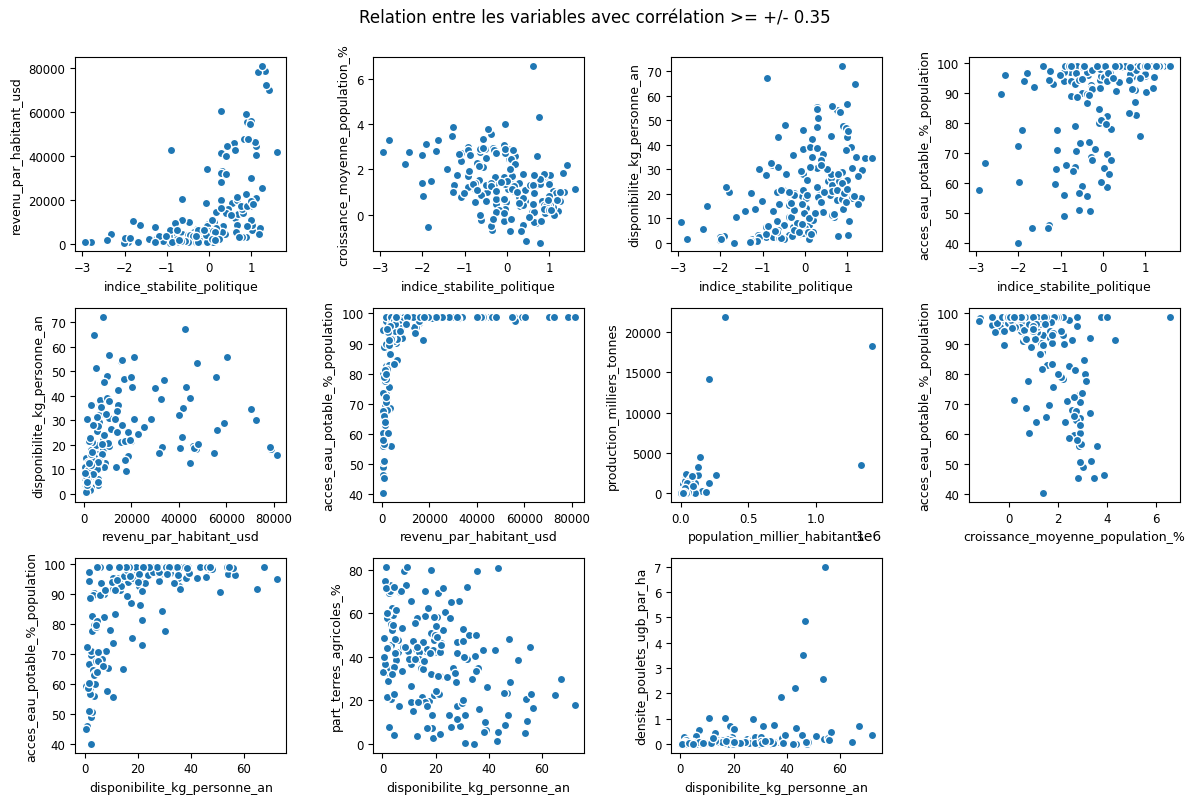

In [66]:
filtered_pairplot(df_final, 0.35)